In [1]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.121 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6277.7/8062.4 GB disk)


In [3]:
with open("/kaggle/input/western-strectched/data.yaml") as f:
    contents = f.read()
    print(contents)

train: train/images
val: valid/images
test: test/images

names: 
  0: Clean
  1: Unclean


In [4]:
import os

# Define paths
base_dir = "/kaggle/working/Final_merged_dataset"
yaml_path = os.path.join(base_dir, "data.yaml")

# Create the directory
os.makedirs(base_dir, exist_ok=True)

# YAML content
yaml_text = """
train: /kaggle/input/western-strectched/train/images
val: /kaggle/input/western-strectched/valid/images
test: /kaggle/input/western-strectched/test/images

names: 
  0: Clean
  1: Unclean
"""

# Write the YAML file
with open(yaml_path, 'w') as file:
    file.write(yaml_text)

print(f"File saved at {yaml_path}")

File saved at /kaggle/working/Final_merged_dataset/data.yaml


In [5]:
!yolo task=detect mode=train model=yolov8s.pt data=/kaggle/working/Final_merged_dataset/data.yaml epochs=200 imgsz=1080 batch=8 lr0=0.001 augment=True patience=50 plots=True

100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 265MB/s]
Ultralytics 8.3.121 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/Final_merged_dataset/data.yaml, epochs=200, time=None, patience=50, batch=8, imgsz=1080, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sa

In [6]:
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
from google.oauth2 import service_account

# Authenticate with Google Drive API
SCOPES = ['https://www.googleapis.com/auth/drive.file']
SERVICE_ACCOUNT_FILE = '/kaggle/input/gcp-json/gen-lang-client-0691548897-b7848e8949b8.json'

creds = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
drive_service = build('drive', 'v3', credentials=creds)

def upload_to_drive(file_path):
    file_name = file_path.split("/")[-1]
    file_metadata = {'name': file_name}
    media = MediaFileUpload(file_path, resumable=True)

    file = drive_service.files().create(body=file_metadata, media_body=media, fields="id").execute()
    file_id = file.get("id")

    # Make file public
    drive_service.permissions().create(
        fileId=file_id,
        body={"role": "reader", "type": "anyone"},
    ).execute()

    print(f"✅ Uploaded {file_name} to Google Drive: https://drive.google.com/file/d/{file_id}/view")

# Upload both models
upload_to_drive("/kaggle/working/runs/detect/train/weights/best.pt")
upload_to_drive("/kaggle/working/runs/detect/train/weights/last.pt")


✅ Uploaded best.pt to Google Drive: https://drive.google.com/file/d/1z_liaDH-oLHb7RAHeyUIzTjv_CBqAiim/view
✅ Uploaded last.pt to Google Drive: https://drive.google.com/file/d/1BT-g1cxOPeC2PeJuSprdUlnXSPf0a7rV/view


In [7]:
# import shutil

# # Define paths
# source_folder = "/kaggle/working/runs/detect/train/weights"  # Folder containing best.pt & last.pt
# zip_path = "/kaggle/working/model_files.zip"  # Destination zip file

# # Create zip archive
# shutil.make_archive(zip_path.replace(".zip", ""), 'zip', source_folder)

# print(f"✅ Zip file created at: {zip_path}")


In [8]:
# import smtplib
# import os
# from email.mime.multipart import MIMEMultipart
# from email.mime.text import MIMEText
# from email.mime.base import MIMEBase
# from email import encoders

# # Sender and Receiver Email
# sender_email = "rmjvv31@gmail.com"   # 🔹 Replace with your Gmail
# receiver_email = "jaivigenshavikas.radhakrishnan826@ptuniv.edu.in"  # 🔹 Replace with the recipient's email
# app_password = "ruhm crig muux kvnm"  # 🔹 Use your App Password or Gmail password

# # Subject and Email Body
# subject = "Your Best Model: best.pt"
# body_text = "Attached is the best.pt model file from the Kaggle training."

# # File Path (Ensure best.pt exists at this location)
# file_path = "/kaggle/working/model_files.zip"

# # Create the email message
# msg = MIMEMultipart()
# msg['From'] = sender_email
# msg['To'] = receiver_email
# msg['Subject'] = subject

# # Attach the email body properly
# msg.attach(MIMEText(body_text, "plain"))

# # Attach the file
# if os.path.exists(file_path):
#     with open(file_path, "rb") as attachment:
#         part = MIMEBase("application", "octet-stream")
#         part.set_payload(attachment.read())
#         encoders.encode_base64(part)
#         part.add_header("Content-Disposition", f"attachment; filename={os.path.basename(file_path)}")
#         msg.attach(part)
# else:
#     print("❌ best.pt file not found! Check the file path.")

# # Send the email
# try:
#     with smtplib.SMTP("smtp.gmail.com", 587) as server:
#         server.starttls()  # Secure connection
#         server.login(sender_email, app_password )  # Login
#         server.sendmail(sender_email, receiver_email, msg.as_string())  # Send Email
#         print("✅ Email sent successfully!")
# except Exception as e:
#     print(f"❌ Failed to send email. Error: {e}")


In [9]:
import matplotlib.pyplot as plt

In [10]:
import os
path = "/kaggle/working/runs/detect/train/"
print(os.listdir(path))


['results.csv', 'R_curve.png', 'train_batch9122.jpg', 'confusion_matrix.png', 'val_batch0_pred.jpg', 'confusion_matrix_normalized.png', 'train_batch1.jpg', 'weights', 'PR_curve.png', 'labels.jpg', 'train_batch2.jpg', 'P_curve.png', 'args.yaml', 'labels_correlogram.jpg', 'train_batch0.jpg', 'train_batch9121.jpg', 'val_batch0_labels.jpg', 'F1_curve.png', 'val_batch1_pred.jpg', 'train_batch9120.jpg', 'val_batch1_labels.jpg', 'results.png']


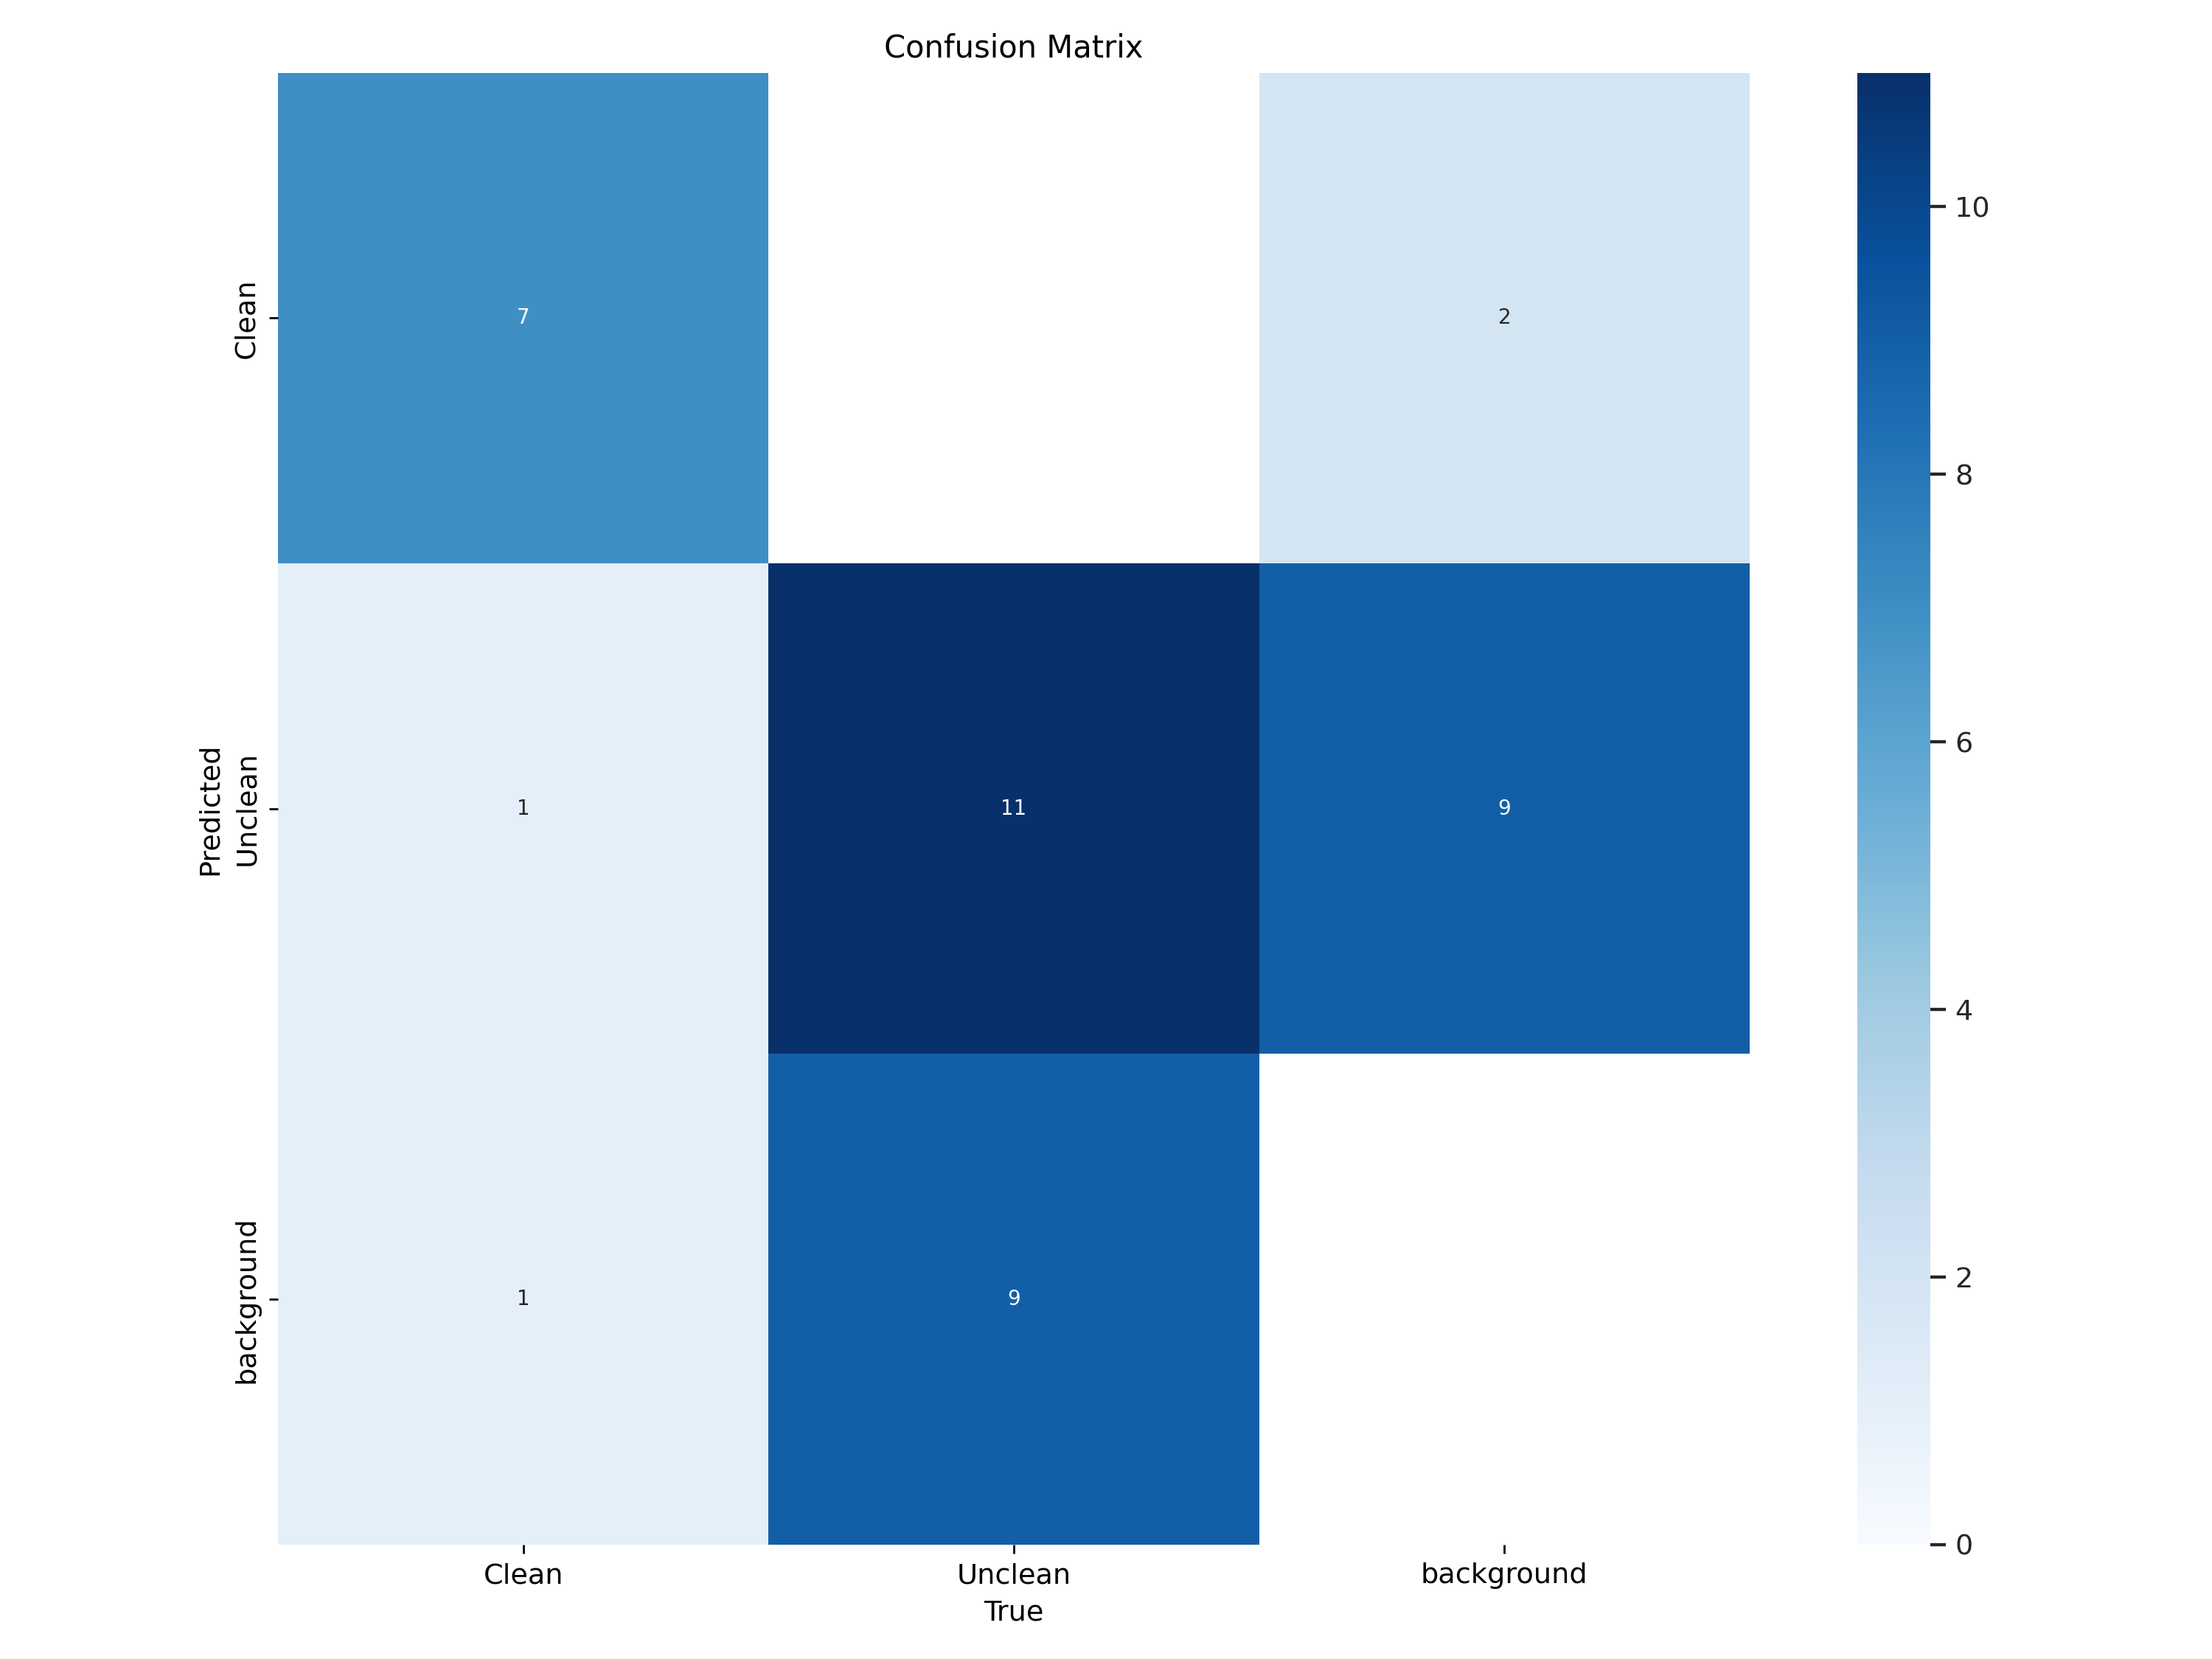

In [11]:
Image(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png',width=1000)

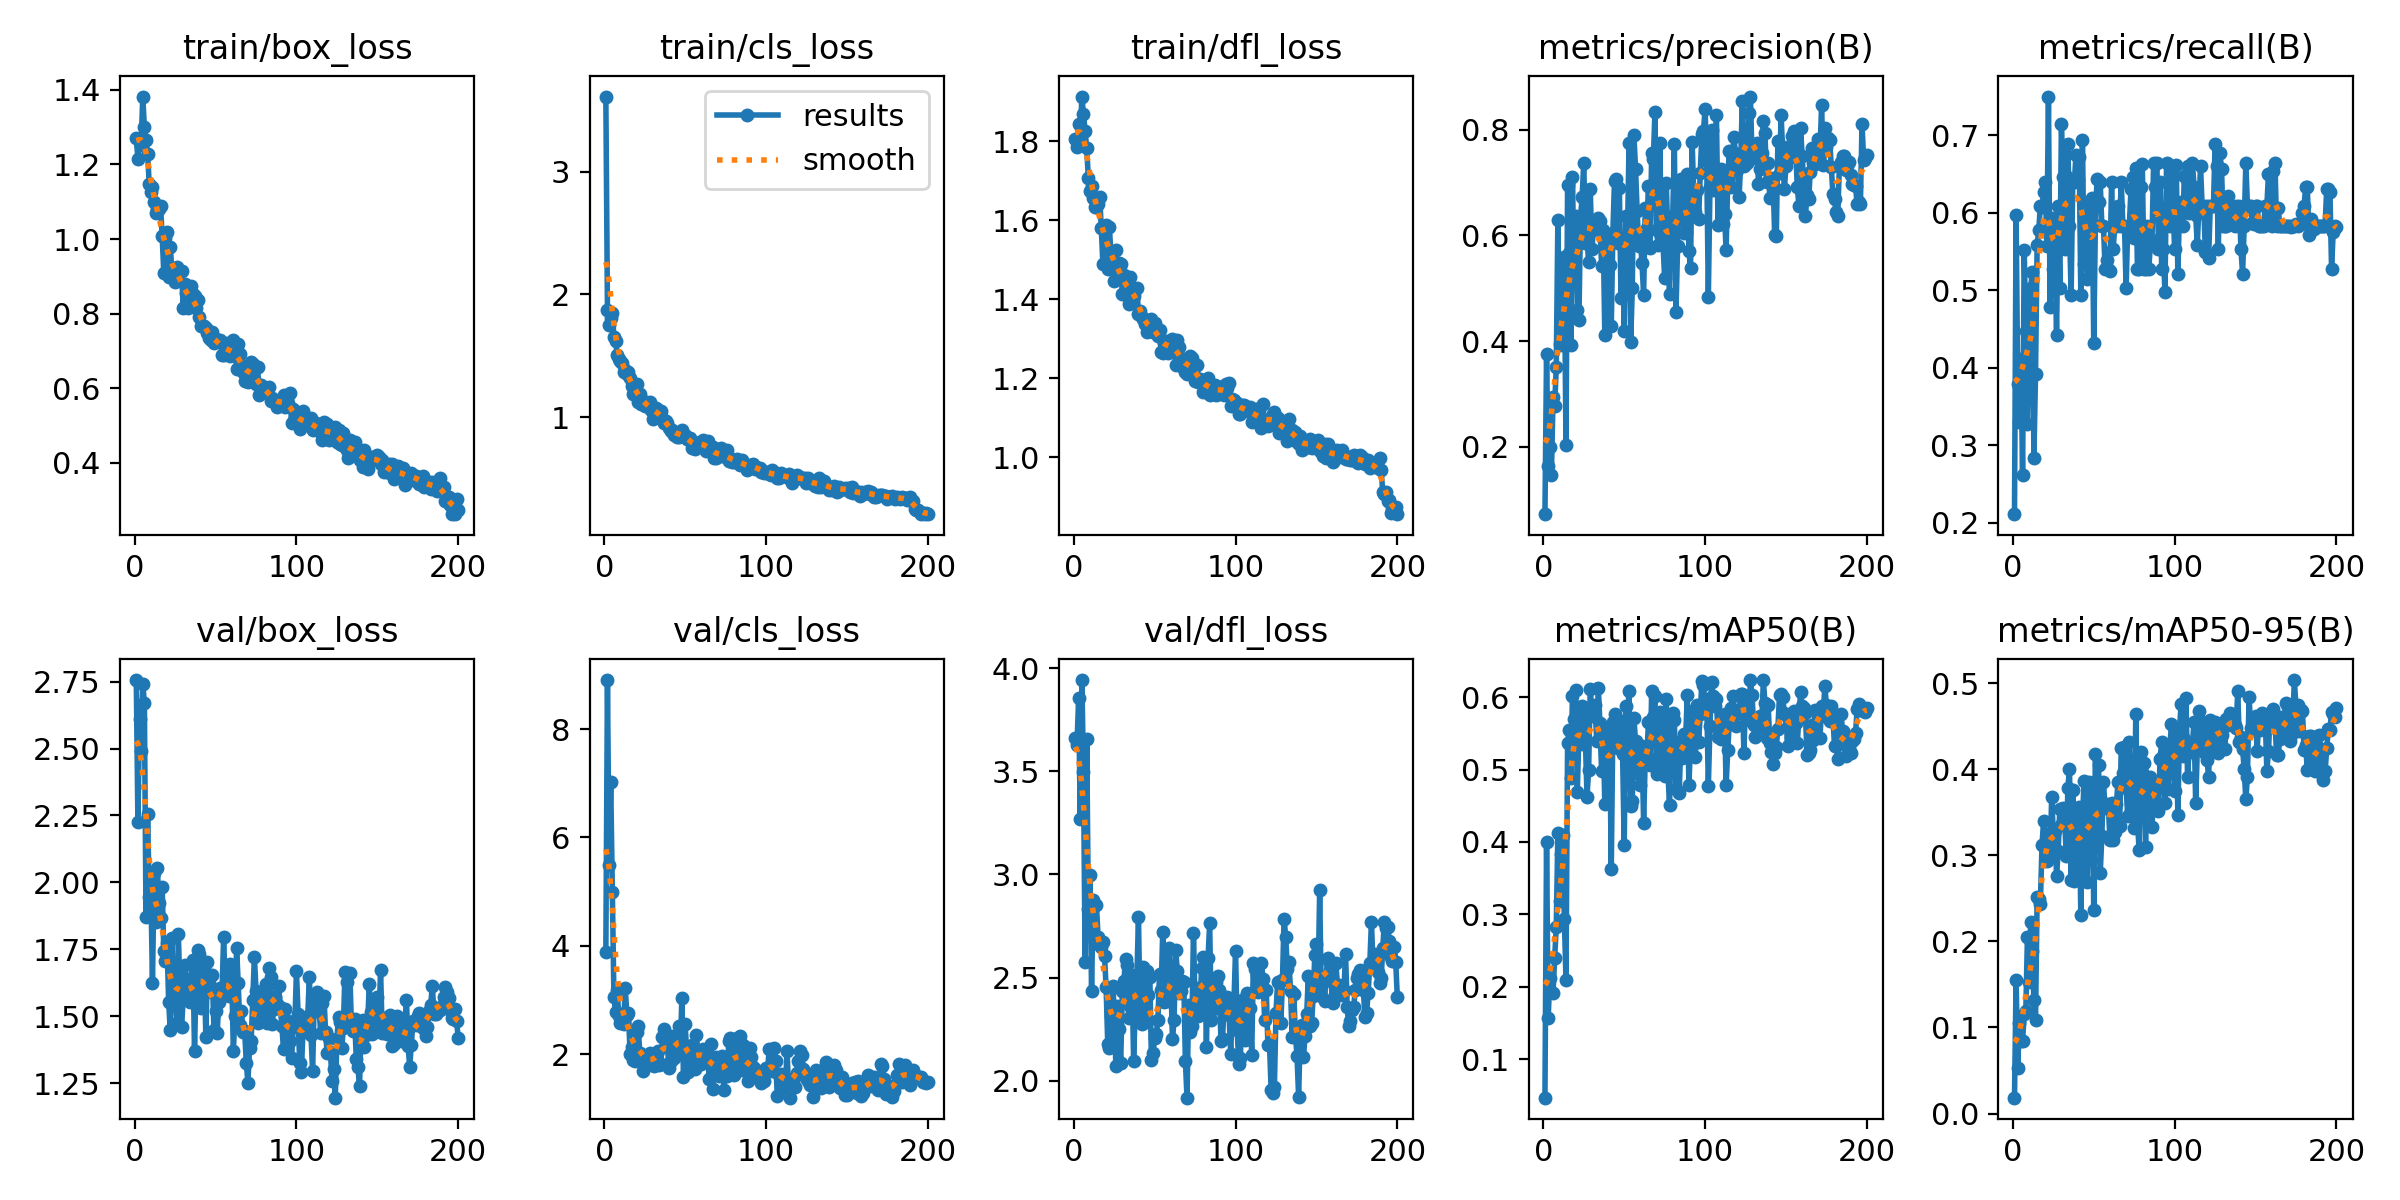

In [12]:
Image(filename=f'/kaggle/working/runs/detect/train/results.png',width=1000)

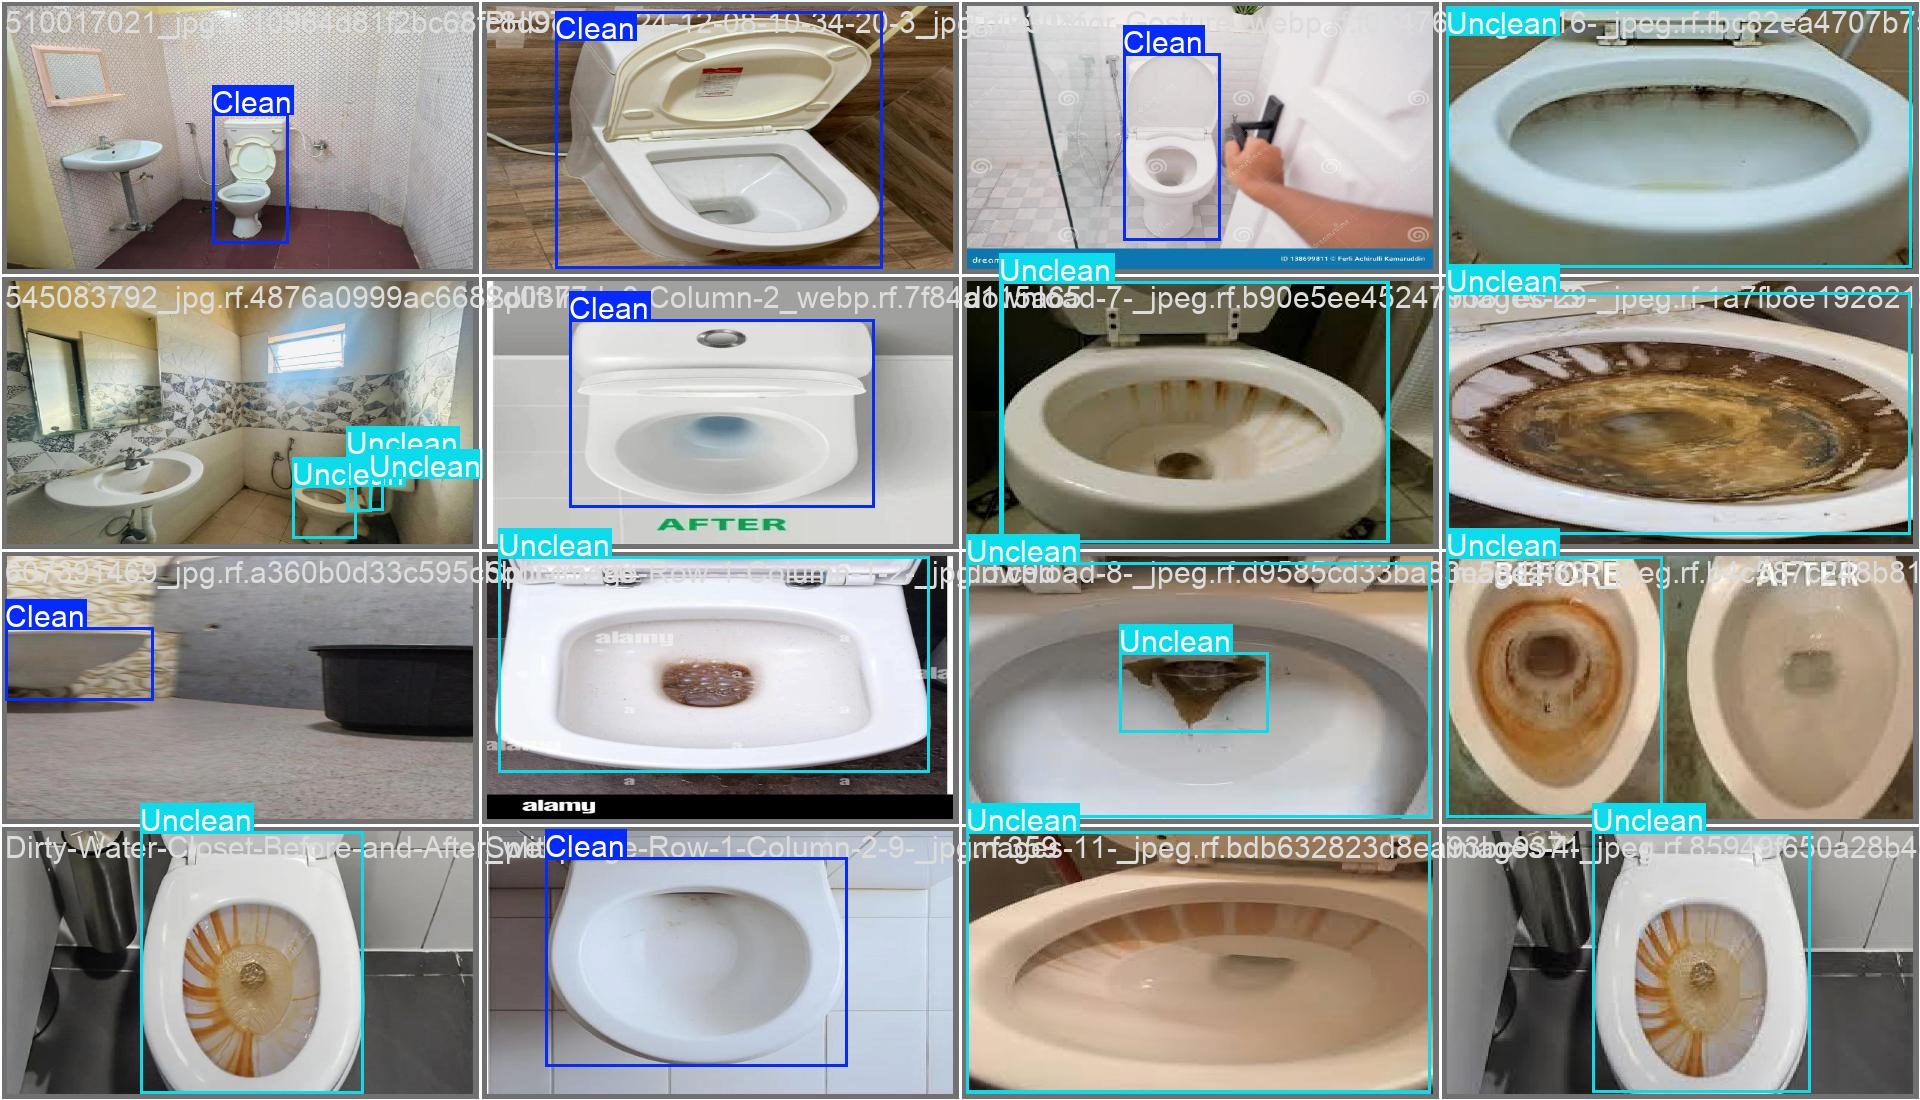

In [13]:
Image(filename=f'/kaggle/working/runs/detect/train/val_batch0_labels.jpg',width=1000)

In [14]:
#Image(filename=f'/kaggle/working/runs/detect/train/val_batch1_labels.jpg',width=1000)

In [15]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

Ultralytics 8.3.121 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.7±0.4 ms, read: 248.9±64.7 MB/s, size: 131.1 KB)


val: Scanning /kaggle/input/western-strectched/valid/labels... 28 images, 1 backgrounds, 5 corrupt: 100%|██████████| 28/28 [00:00<00:00, 411.47it/s]

val: /kaggle/input/western-strectched/valid/images/Dirty-Water-Closet_jpg.rf.656fbece52ffd7e111d0577ec85fc435.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3395]
val: /kaggle/input/western-strectched/valid/images/Toilet-Lid-Up-No-Bottom_jpg.rf.83d7085bb336a76c3822b0a5a2e8a8c7.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3869]
val: /kaggle/input/western-strectched/valid/images/images-24-_jpeg.rf.32606b9dd99e271ae8e0b4527481c3e4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1109      1.4877]
val: /kaggle/input/western-strectched/valid/images/images-43-_jpeg.rf.b1d4649f8d777b34fb64be30106b8209.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0041]
val: /kaggle/input/western-strectched/valid/images/suggested-ZRjz7yyUb90A8jQHGlgF_jpg.rf.4b4b9c2cb281ed4e98069c7c5899da19.jpg: ignoring corrupt image/label: non-normalized or out of bou


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]


                   all         23         29      0.798      0.583      0.706      0.612
                 Clean          9          9      0.936      0.667      0.791      0.698
               Unclean         13         20      0.661        0.5      0.621      0.526
Speed: 5.8ms preprocess, 18.1ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to runs/detect/val
Validation Accuracy: 79.84%


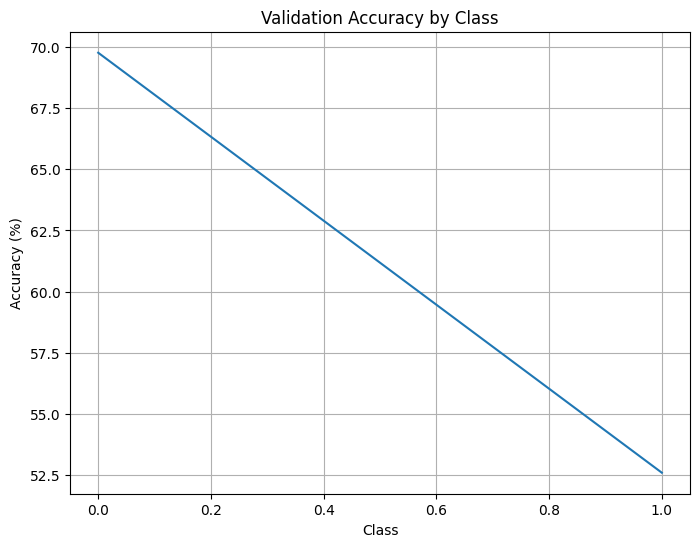

In [16]:
validator = model.val(data='/kaggle/working/Final_merged_dataset/data.yaml', 
                     save=False, 
                     plots=True, 
                     conf=0.25, 
                     iou=0.45)

# Get the validation metrics
box_metrics = validator.box  # Get the detection metrics

# Print the overall validation accuracy
print(f"Validation Accuracy: {box_metrics.mp*100:.2f}%")

# Plot the validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(box_metrics.ap * 100)
plt.title("Validation Accuracy by Class")
plt.xlabel("Class")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

In [17]:
test_validator = model.val(data='/kaggle/working/Final_merged_dataset/data.yaml', 
                          split='test',
                          save=False, 
                          plots=True, 
                          conf=0.25, 
                          iou=0.45)

Ultralytics 8.3.121 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 30.3±8.3 MB/s, size: 143.4 KB)


val: Scanning /kaggle/input/western-strectched/test/labels... 20 images, 1 backgrounds, 4 corrupt: 100%|██████████| 20/20 [00:00<00:00, 244.51it/s]

val: /kaggle/input/western-strectched/test/images/download-4-_jpeg.rf.e2c174f771171335aa3bf40562f5f4d6.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0008]
val: /kaggle/input/western-strectched/test/images/suggested-BzyiZY8HoJSbEH6EHiv6_jpg.rf.276b74db0158368d86dcee1f2d376816.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2594]
val: /kaggle/input/western-strectched/test/images/suggested-SVeQ2VEnRK1XnQLmHDgB_jpg.rf.a0e5272176bc929b63f97cf0c20c4960.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2522]
val: /kaggle/input/western-strectched/test/images/suggested-dfs6SIhVYij6liSKNjPk_jpg.rf.e5258790ed74b12d7ef6484eb23730f4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1415]
WARNING ⚠️ val: Cache directory /kaggle/input/western-strectched/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


                   all         16         18      0.878        0.6      0.768      0.678
                 Clean          8          8          1        0.5       0.75       0.62
               Unclean          8         10      0.756        0.7      0.785      0.736
Speed: 0.3ms preprocess, 17.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val2


Test Accuracy: 87.79%


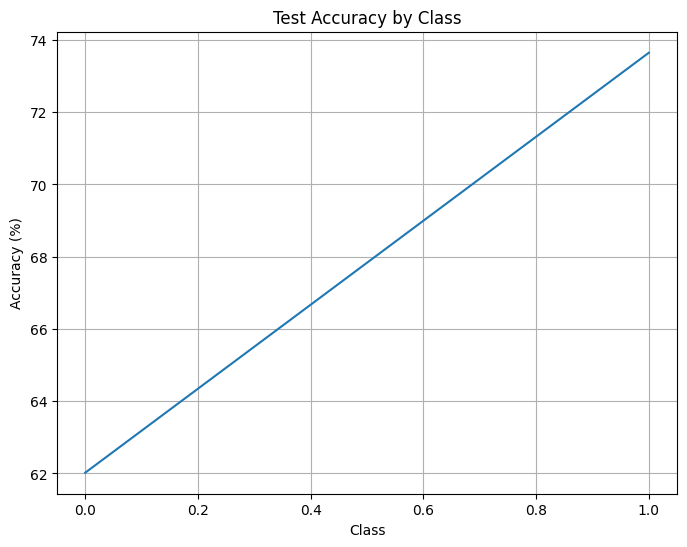

In [18]:
test_metrics = test_validator.box  # Get the detection metrics

# Print the overall test accuracy
print(f"Test Accuracy: {test_metrics.mp*100:.2f}%")

# Plot the per-class test accuracy
plt.figure(figsize=(8, 6))
plt.plot(test_metrics.ap * 100)
plt.title("Test Accuracy by Class")
plt.xlabel("Class")
plt.ylabel("Accuracy (%)")
plt.grid()
plt.show()

In [19]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/input/western-restrooms-only/test/images save=True

Ultralytics 8.3.121 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/12 /kaggle/input/western-restrooms-only/test/images/Dirty-Water-Closet-Before-and-After-1-_jpg.rf.9c808d0d5fb395f2ab8e5e67362eb558.jpg: 1088x1088 1 Clean, 38.2ms
image 2/12 /kaggle/input/western-restrooms-only/test/images/PHOTO-2024-12-08-10-34-20-2_jpg.rf.fb1e3e7390ea37fb94fb9e60c86bec11.jpg: 1088x1088 1 Clean, 38.3ms
image 3/12 /kaggle/input/western-restrooms-only/test/images/Split-Image-Column-1-Row-1-1-_webp.rf.e7669ab1db50e43e0419f8c33a3f6547.jpg: 1088x1088 1 Unclean, 38.2ms
image 4/12 /kaggle/input/western-restrooms-only/test/images/Split-Image-Row-1-Column-2-4-_jpg.rf.a71ca364512849c3845d44f4c780f1df.jpg: 1088x1088 2 Cleans, 2 Uncleans, 37.1ms
image 5/12 /kaggle/input/western-restrooms-only/test/images/loai-6-1_jpg.rf.115fa96b5017919e6bce336b42e2cdaa.jpg: 1088x1088 1 Unclean, 30.2ms
image 6/12 /kaggle/input/wester

In [20]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/*.jpg')[100:116]:
      display(Image(filename=image_path, width=500))